In [1]:
import warnings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier)

from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, PolynomialFeatures

from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV,
StratifiedKFold, learning_curve, cross_val_predict, cross_validate,
permutation_test_score, validation_curve, StratifiedKFold, RandomizedSearchCV)

from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report)

warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('Crop_Data.csv', engine='pyarrow')
df.head()

,temperature,humidity,ph,rainfall,label,Label_Num
0,20.879744,82.002744,6.502985,202.935536,rice,0
1,21.770462,80.319644,7.038096,226.655537,rice,0
2,23.004459,82.320763,7.840207,263.964248,rice,0
3,26.491096,80.158363,6.980401,242.864034,rice,0
4,20.130175,81.604873,7.628473,262.717340,rice,0


In [3]:
df.isna().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
Label_Num      0
dtype: int64

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   ph           2200 non-null   float64
 3   rainfall     2200 non-null   float64
 4   label        2200 non-null   object 
 5   Label_Num    2200 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 223.9 KB


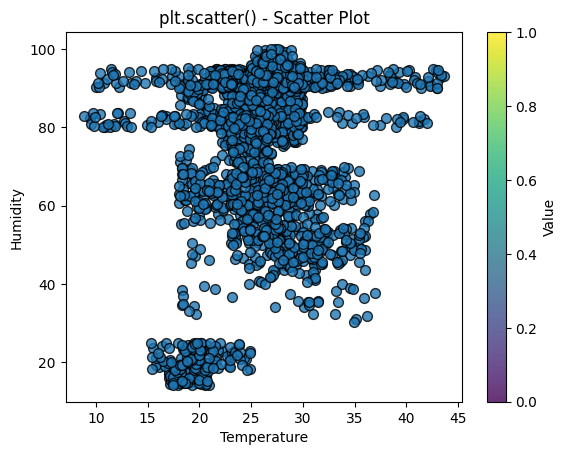

In [5]:
# Example 2: Scatter plot (plt.scatter)
#plt.subplot(3, 3, 2)
plt.scatter(data=df, x='temperature', y='humidity', cmap='viridis', 
            s=50, alpha=0.8, edgecolors='k')
plt.title('plt.scatter() - Scatter Plot')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.colorbar(label='Value');

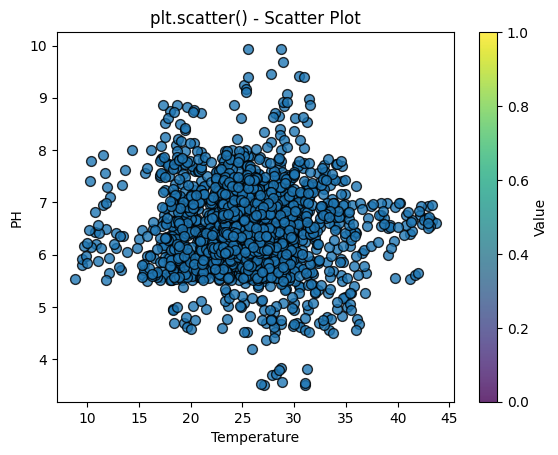

In [6]:
# Example 2: Scatter plot (plt.scatter)
#plt.subplot(3, 3, 2)
plt.scatter(data=df, x='temperature', y='ph', cmap='viridis', 
            s=50, alpha=0.8, edgecolors='k')
plt.title('plt.scatter() - Scatter Plot')
plt.xlabel('Temperature')
plt.ylabel('PH')
plt.colorbar(label='Value');

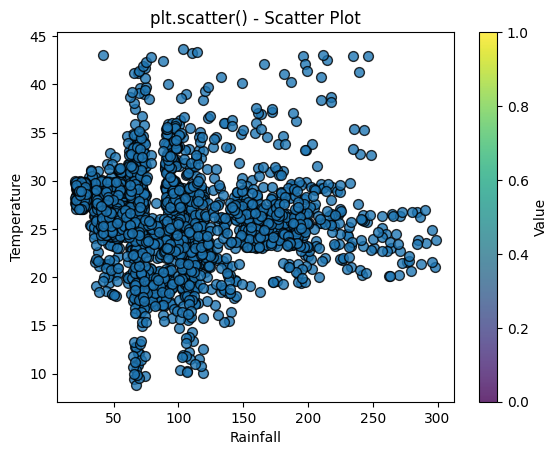

In [7]:
# Example 2: Scatter plot (plt.scatter)
#plt.subplot(3, 3, 2)
plt.scatter(data=df, x='rainfall', y='temperature', cmap='viridis', 
            s=50, alpha=0.8, edgecolors='k')
plt.title('plt.scatter() - Scatter Plot')
plt.xlabel('Rainfall')
plt.ylabel('Temperature')
plt.colorbar(label='Value');

In [18]:
#df[['label','Label_Num']].value_counts()

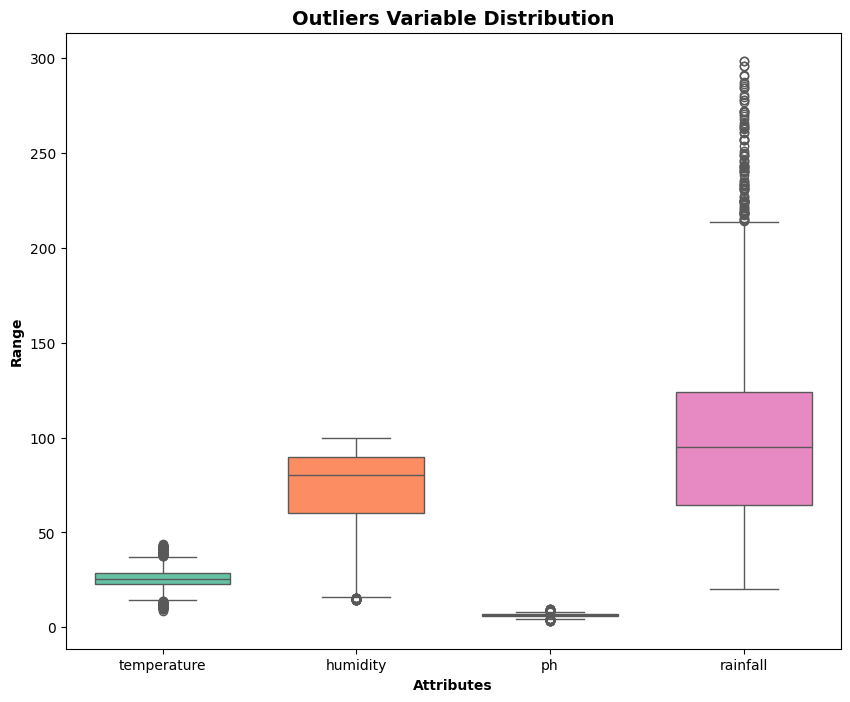

In [8]:
# Visualize Outlier Analysis one by one
cols = ['temperature', 'humidity', 'ph', 'rainfall'] 

plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[cols], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

In [101]:
# Removing (statistical) outliers for humidity
Q1 = df.temperature.quantile(0.25)
Q3 = df.temperature.quantile(0.75)
IQR = Q3 - Q1
print(f"Shape {df.shape} with Outliers")
df = df[(df.temperature >= Q1 - 1.5 * IQR) & (df.temperature <= Q3 + 1.5 * IQR)]
print(f"Shape {df.shape} without Outliers") 

Shape (1700, 6) with Outliers
Shape (1700, 6) without Outliers


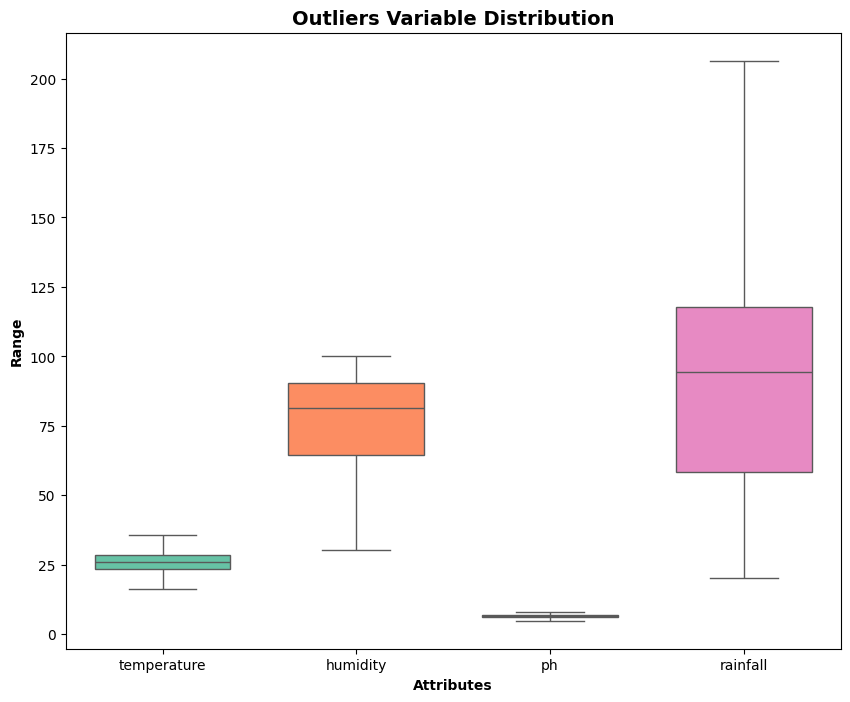

In [102]:
# Visualize Outlier Analysis one by one
cols = ['temperature', 'humidity', 'ph', 'rainfall'] 

plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[cols], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

In [103]:
df.head()

,temperature,humidity,ph,rainfall,label,Label_Num
0,20.879744,82.002744,6.502985,202.935536,rice,0
13,24.014976,82.056872,6.984354,185.277339,rice,0
17,23.793920,80.418180,6.970860,206.261186,rice,0
20,21.325042,80.474764,6.442475,185.497473,rice,0
29,22.301574,80.644165,6.043305,197.979121,rice,0


In [104]:
df.reset_index(drop=True, inplace=True) 

In [105]:
df.drop(columns=['Label_Num'], inplace=True)

In [74]:
#df['label'].value_counts()

In [76]:
#df.to_csv('crop_data_clean.csv', index=False)

In [106]:
# Option 2: Use a loop for multiple columns
categorical_cols = df.select_dtypes(include=['object', 'category'])
label_encoders = {} 

for col in categorical_cols: 
    le = LabelEncoder() 
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for potential inverse transform

In [118]:
df.drop(df.select_dtypes(include=['object', 'category']), axis=1, inplace=True)

In [171]:
df.head()

,temperature,humidity,ph,rainfall,label_encoded
0,20.879744,82.002744,6.502985,202.935536,18
1,24.014976,82.056872,6.984354,185.277339,18
2,23.793920,80.418180,6.970860,206.261186,18
3,21.325042,80.474764,6.442475,185.497473,18
4,22.301574,80.644165,6.043305,197.979121,18


## Adaboost

In [117]:
df1 = df.copy()
df1[['label', 'label_encoded']]

,label,label_encoded
0,rice,18
1,rice,18
2,rice,18
3,rice,18
4,rice,18
...,...,...
1695,coffee,4
1696,coffee,4
1697,coffee,4
1698,coffee,4


In [156]:
df1.drop(columns=['label_encoded'], axis=1, inplace=True)

In [172]:
df1.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,24.014976,82.056872,6.984354,185.277339,rice
2,23.793920,80.418180,6.970860,206.261186,rice
3,21.325042,80.474764,6.442475,185.497473,rice
4,22.301574,80.644165,6.043305,197.979121,rice


Dataset shape: (1700, 4)
Number of features: 4
Number of classes: 20
----------------------------------------------------------------------------------------------------
--- Basic AdaBoost Model ---
Accuracy test set: 0.1647
Accuracy train set: 0.1625
----------------------------------------------------------------------------------------------------
--- Grid Search for Hyperparameter Tuning ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'estimator__max_depth': 5, 'learning_rate': 1.0, 'n_estimators': 200}
Best cross-validation score: 0.9500
----------------------------------------------------------------------------------------------------
Test accuracy with best model test set: 0.9324
Test accuracy with best model train set: 1.0000
--- Feature Importances ---


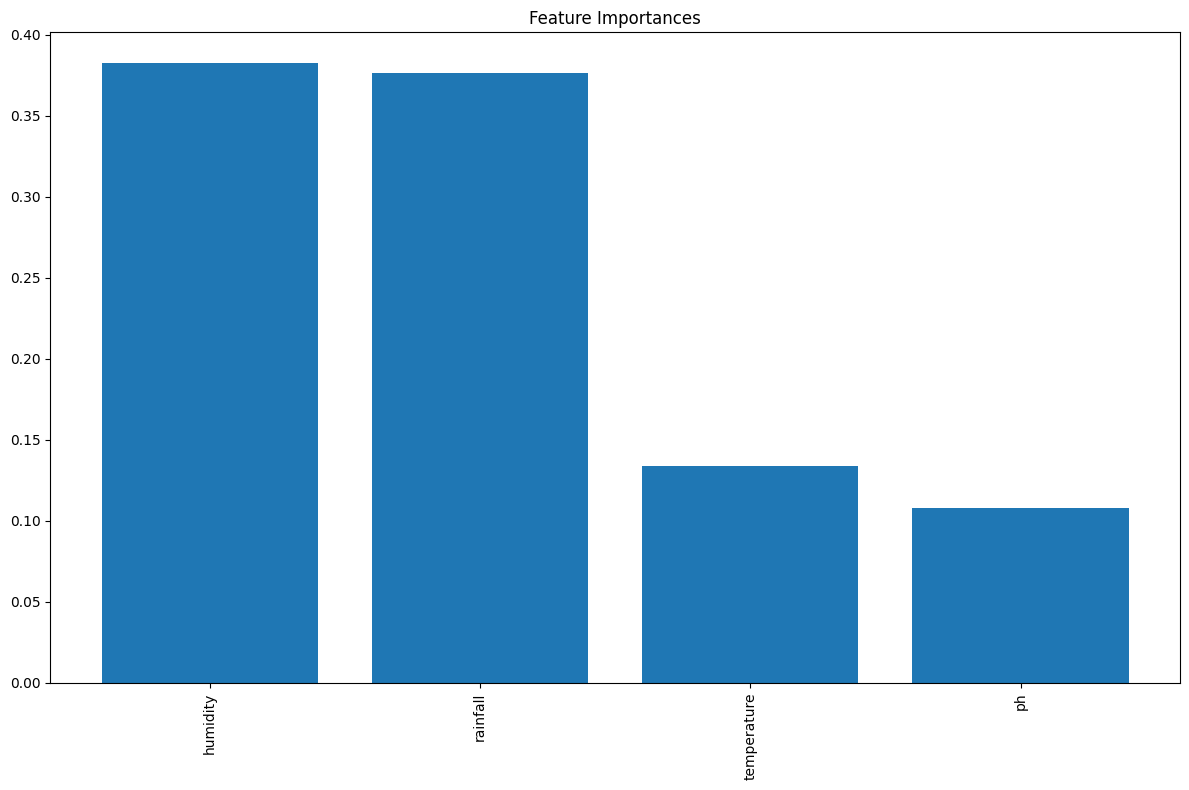

--- Learning Curve ---


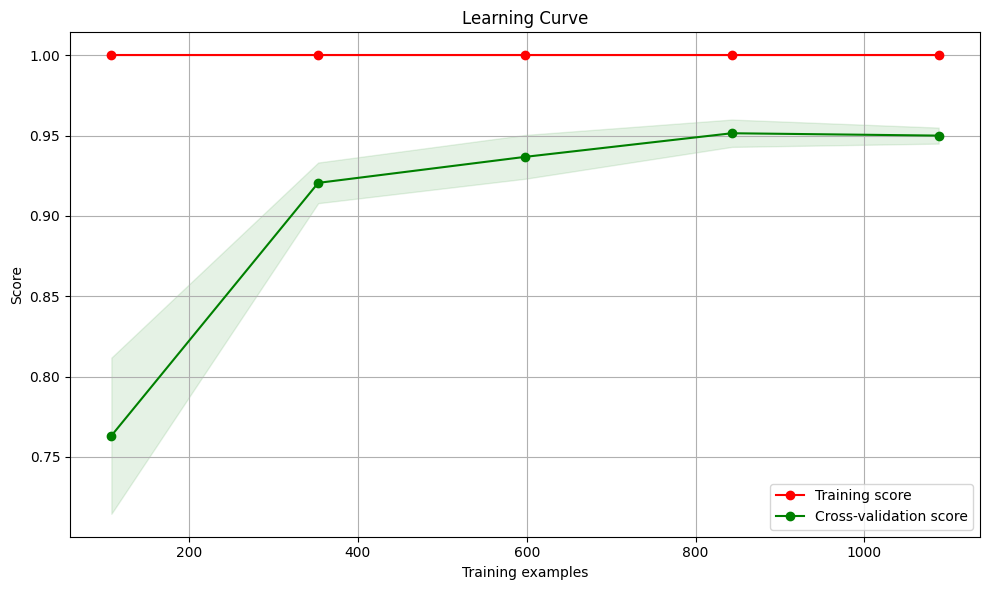

--- Effect of Learning Rate ---


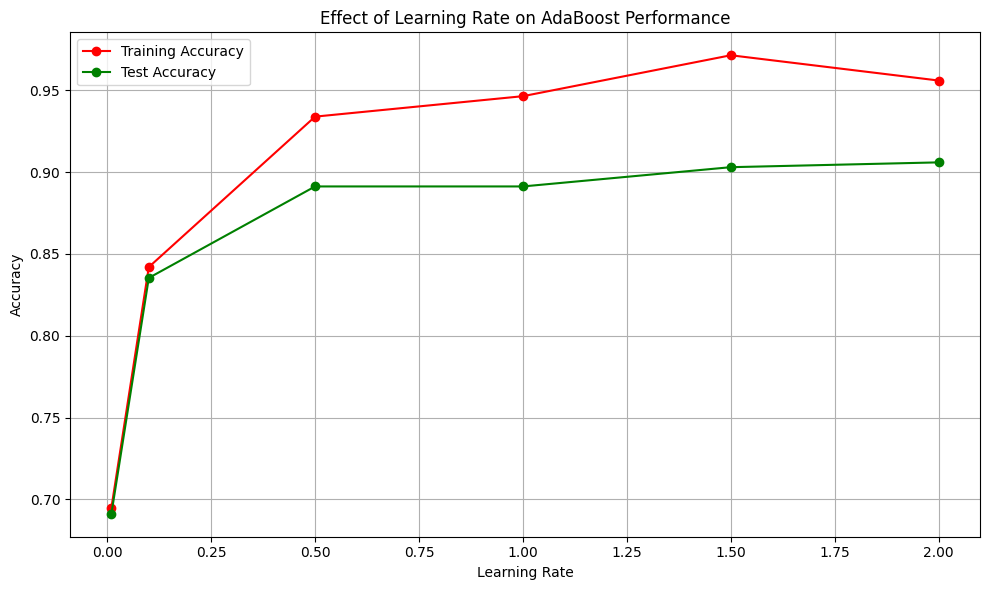

--- Effect of Number of Estimators ---


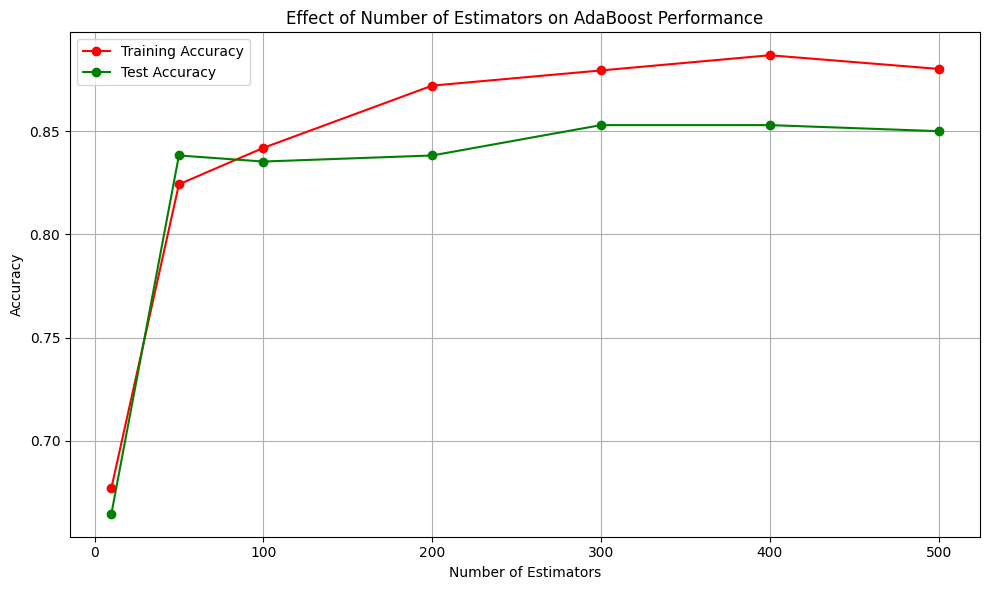

--- Pipeline with AdaBoost ---
Best pipeline parameters: {'adaboost__n_estimators': 100, 'adaboost__learning_rate': 1.0, 'adaboost__estimator': DecisionTreeClassifier(max_depth=3, random_state=42)}
Best cross-validation score: 0.9154

----------------------------------------------------------------------------------------------------
Pipeline test accuracy:  0.8912
Pipeline train accuracy: 0.9463
----------------------------------------------------------------------------------------------------
--- Model Comparison ---
Base AdaBoost accuracy: 0.1647
Grid Search tuned accuracy: 0.9324
Pipeline tuned accuracy: 0.8912


In [160]:
# Load the dataset
X = df1.drop(columns=['label'], axis=1)
y = df1['label']

# Print dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
#print(f"Class distribution: {np.bincount(y)}")
print('-' *100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Basic AdaBoost model with default parameters
print("--- Basic AdaBoost Model ---")
base_model = AdaBoostClassifier(random_state=42, algorithm='SAMME')
base_model.fit(X_train_scaled, y_train)
y_pred = base_model.predict(X_test_scaled)
y_pred_train = base_model.predict(X_train_scaled)

print(f"Accuracy test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print('-' *100) 

# Grid search for hyperparameter tuning
print("--- Grid Search for Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 3, 5]
}

# Create base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create AdaBoost model
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42, algorithm='SAMME')

# Create grid search
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print('-' *100)

# Train model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_grid = best_model.predict(X_test_scaled)
y_pred_grid_train = best_model.predict(X_train_scaled)
print(f"Test accuracy with best model test set: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Test accuracy with best model train set: {accuracy_score(y_train, y_pred_grid_train):.4f}")

# Visualize feature importances
def plot_feature_importance(model, feature_names):
    # For AdaBoost, feature_importances_ is available after fitting
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        # For pipeline, need to access the classifier
        importances = model.named_steps['adaboost'].feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(len(indices[:15])), importances[indices[:15]], align='center')
    plt.xticks(range(len(indices[:15])), [feature_names[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.show()

print("--- Feature Importances ---")
plot_feature_importance(best_model, X_train.columns)

# Learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve", ylim=None, cv=5, n_jobs=-1):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, 
        train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

print("--- Learning Curve ---")
plot_learning_curve(best_model, X_train_scaled, y_train)

# Effect of different learning rates
def plot_learning_rate_effect():
    learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
    train_scores = []
    test_scores = []
    
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=100,
            learning_rate=lr,
            algorithm='SAMME',
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(learning_rates, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Effect of Learning Rate on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("--- Effect of Learning Rate ---")
plot_learning_rate_effect()

# Effect of number of estimators
def plot_n_estimators_effect():
    n_estimators_range = [10, 50, 100, 200, 300, 400, 500]
    train_scores = []
    test_scores = []
    
    for n_est in n_estimators_range:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=n_est,
            learning_rate=0.1,
            algorithm='SAMME',
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(n_estimators_range, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title('Effect of Number of Estimators on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("--- Effect of Number of Estimators ---")
plot_n_estimators_effect()

# Pipeline example with AdaBoost
print("--- Pipeline with AdaBoost ---")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(random_state=42, algorithm='SAMME'))
])

# Parameters for pipeline
pipeline_params = {
    'adaboost__estimator': [DecisionTreeClassifier(max_depth=1, random_state=42),
                           DecisionTreeClassifier(max_depth=3, random_state=42)],
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Randomized search to speed up the tuning process
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=pipeline_params,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit randomized search
random_search.fit(X_train, y_train)  # Note: Using unscaled data since scaling is part of the pipeline

# Print best parameters
print(f"Best pipeline parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}\n")
print('-' *100) 

# Evaluate the best pipeline model
best_pipeline = random_search.best_estimator_
y_pred_pipeline = best_pipeline.predict(X_test)
y_pred_pipeline_train = best_pipeline.predict(X_train)
print(f"Pipeline test accuracy:  {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Pipeline train accuracy: {accuracy_score(y_train, y_pred_pipeline_train):.4f}")
print('-' *100) 

# Compare with base model
print("--- Model Comparison ---")
print(f"Base AdaBoost accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Grid Search tuned accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Pipeline tuned accuracy: {accuracy_score(y_test, y_pred_pipeline):.4f}")

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = y_pred
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = y_pred_grid
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = y_pred_pipeline
display(pipe_model_df.head())  

## BaggingClassifier

In [126]:
target_names = y.values
target_names

array([18, 18, 18, ...,  4,  4,  4])

Dataset shape: (1700, 4)
Number of features: 4
Number of classes: 20
----------------------------------------------------------------------------------------------------
BaggingClassifier Accuracy test set: 0.9382
BaggingClassifier Accuracy train set: 0.9934
Feature Importance (Bagging Classifier):
       Feature  Importance       Std
3     rainfall    0.374278  0.018345
1     humidity    0.324842  0.020303
0  temperature    0.174908  0.014070
2           ph    0.125973  0.013139


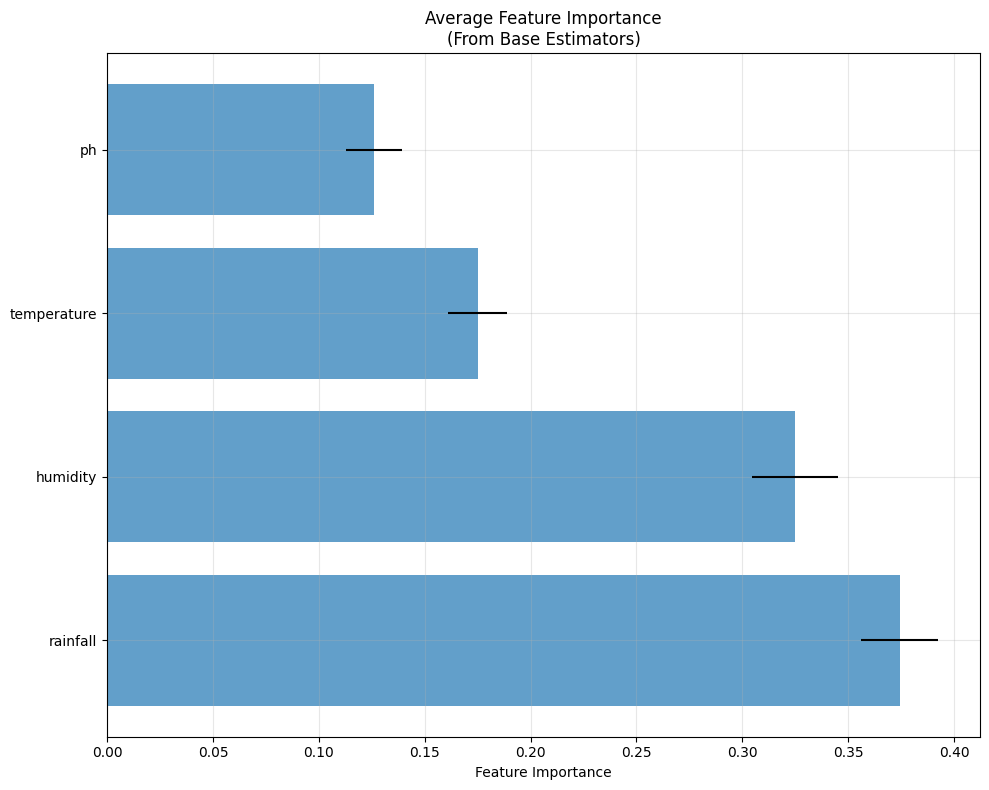

----------------------------------------------------------------------------------------------------
--- Hyperparemeter Tuning ---
----------------------------------------------------------------------------------------------------
Starting grid search...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Grid search completed!
----------------------------------------------------------------------------------------------------
Best parameters: {'bootstrap': True, 'bootstrap_features': True, 'estimator__max_depth': 10, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
Best cross-validation score: 0.9625
----------------------------------------------------------------------------------------------------
Tuned BaggingClassifier Accuracy: 0.9353
Improvement: -0.0029
Feature Importance2 (Bagging Classifier):
       Feature  Importance       Std
2           ph    0.272216  0.112900
3     rainfall    0.248722  0.108797
1     humidity    0.240238  0.115435
0  temperatu

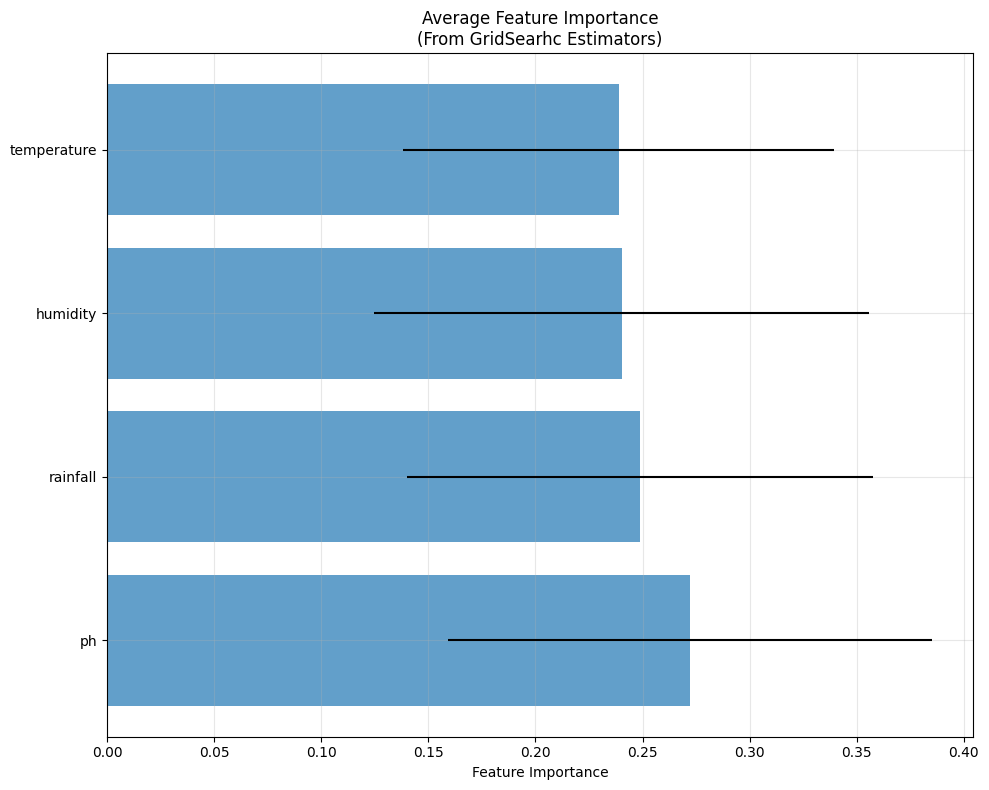

----------------------------------------------------------------------------------------------------


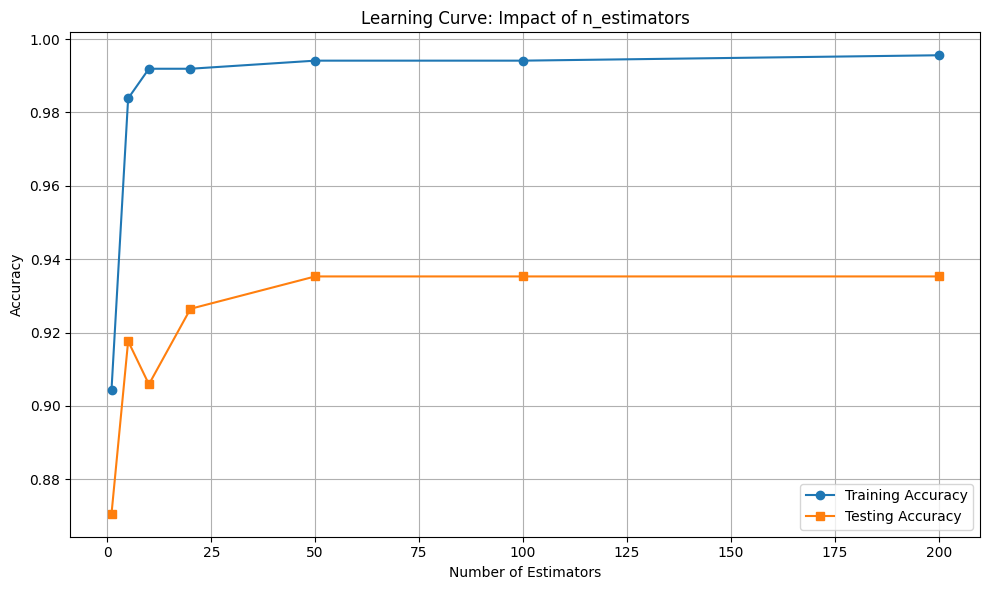

In [161]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
X = df1.drop(columns=['label'], axis=1)
y = df1['label']

# Features and target names
feature_names = X.columns 
target_names = y.values  

# Print dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
#print(f"Class distribution: {np.bincount(y)}")
print('-' *100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a base classifier (Decision Tree in this case)
base_clf = DecisionTreeClassifier(random_state=42)

# Create and train a simple BaggingClassifier with default parameters
bag_clf = BaggingClassifier(estimator=base_clf, random_state=42)
bag_clf.fit(X_train_scaled, y_train)

# Evaluate initial model
y_pred = bag_clf.predict(X_test_scaled)
y_pred_train = bag_clf.predict(X_train_scaled)

# Initial accuracy
initial_accuracy = accuracy_score(y_test, y_pred)

print(f"BaggingClassifier Accuracy test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"BaggingClassifier Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")

# Method 1: Average feature importance across all estimators
def get_feature_importance_bagging(bagging_model, feature_names):
    """Extract feature importance from BaggingClassifier"""
    # Get feature importance from each estimator
    importances = []
    for estimator in bagging_model.estimators_:
        if hasattr(estimator, 'feature_importances_'):
            importances.append(estimator.feature_importances_)
    
    # Average the importances
    mean_importance = np.mean(importances, axis=0)
    std_importance = np.std(importances, axis=0)
    
    return mean_importance, std_importance

# Get feature importance
mean_importance, std_importance = get_feature_importance_bagging(bag_clf, feature_names)

# Create DataFrame for easy viewing
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': mean_importance,
    'Std': std_importance
}).sort_values('Importance', ascending=False)

print("Feature Importance (Bagging Classifier):")
print(importance_df) 

# Plot 1: Average feature importance from estimators
plt.barh(range(len(importance_df)), importance_df['Importance'], 
         xerr=importance_df['Std'], alpha=0.7)
plt.yticks(range(len(importance_df)), importance_df['Feature'])  # Fixed this line
plt.xlabel('Feature Importance')  # Fixed this line
plt.title('Average Feature Importance\n(From Base Estimators)')  # Fixed this line
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Define parameter grid for GridSearchCV
print('-' *100)
print("--- Hyperparemeter Tuning ---")
print('-' *100)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'estimator__max_depth': [None, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=BaggingClassifier(estimator=base_clf, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to find best parameters
print("Starting grid search...")
grid_search.fit(X_train_scaled, y_train)
print("Grid search completed!")
print('-' *100) 

# Get best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print('-' *100) 

# Get the best model
best_bag_clf = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_bag_clf.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned BaggingClassifier Accuracy: {tuned_accuracy:.4f}")
print(f"Improvement: {tuned_accuracy - initial_accuracy:.4f}")

# Method 1: Average feature importance across all estimators
def get_feature_importance_bagging2(bagging_model, feature_names):
    """Extract feature importance from BaggingClassifier"""
    # Get feature importance from each estimator
    importances2 = []
    for estimator2 in bagging_model.estimators_:
        if hasattr(estimator2, 'feature_importances_'):
            importances2.append(estimator2.feature_importances_)
    
    # Average the importances
    mean_importance2 = np.mean(importances2, axis=0)
    std_importance2 = np.std(importances2, axis=0)
    
    return mean_importance2, std_importance2

# Get feature importance
mean_importance2, std_importance2 = get_feature_importance_bagging2(best_bag_clf, feature_names)

# Create DataFrame for easy viewing
importance_df2 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': mean_importance2,
    'Std': std_importance2
}).sort_values('Importance', ascending=False)

print("Feature Importance2 (Bagging Classifier):")
print(importance_df2)

# Plot 1: Average feature importance from estimators
plt.barh(range(len(importance_df2)), importance_df2['Importance'], 
         xerr=importance_df2['Std'], alpha=0.7)
plt.yticks(range(len(importance_df2)), importance_df2['Feature'])  # Fixed this line
plt.xlabel('Feature Importance')  # Fixed this line
plt.title('Average Feature Importance\n(From GridSearhc Estimators)')  # Fixed this line
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyzing the impact of n_estimators
print('-' *100) 
n_estimators_range = [1, 5, 10, 20, 50, 100, 200]
train_scores = []
test_scores = []

for n_estimators in n_estimators_range:

    # Create model with current n_estimators value
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=best_bag_clf.estimator_.max_depth),
        n_estimators=n_estimators,
        max_samples=best_bag_clf.max_samples,
        max_features=best_bag_clf.max_features,
        bootstrap=best_bag_clf.bootstrap,
        bootstrap_features=best_bag_clf.bootstrap_features,
        random_state=42
    )
    
    # Train model
    bag.fit(X_train_scaled, y_train)
    
    # Evaluate on train and test sets
    train_score = accuracy_score(y_train, bag.predict(X_train_scaled))
    test_score = accuracy_score(y_test, bag.predict(X_test_scaled))
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, test_scores, label='Testing Accuracy', marker='s')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Impact of n_estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = y_pred
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = y_pred_tuned
display(grid_model_df.head())

## GradientBoostingClassifier

Dataset shape: (1700, 4)
Features: Index(['temperature', 'humidity', 'ph', 'rainfall'], dtype='object')
Classes: ['rice' 'rice' 'rice' ... 'coffee' 'coffee' 'coffee']
----------------------------------------------------------------------------------------------------
1. INITIAL MODEL WITH DEFAULT PARAMETERS
----------------------------------------------------------------------------------------------------
Accuracy on test set: 0.9265
Accuracy on train set: 1.0000


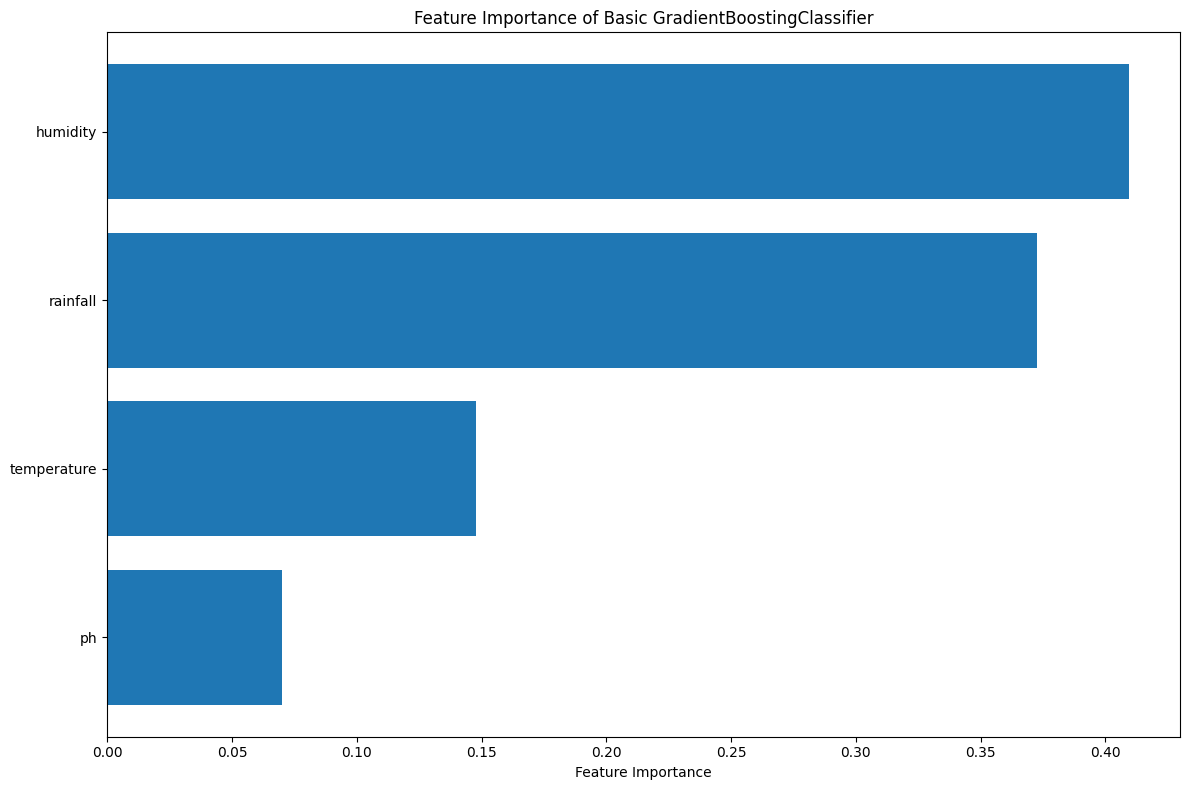

----------------------------------------------------------------------------------------------------
2. HYPERPARAMETER TUNING
----------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [170]:
# Set random seed for reproducibility
np.random.seed(42)

# Load dataset (breast cancer dataset as an example)
X = df1.drop(columns=['label'], axis=1)
y = df1['label']

# If feature_names are not provided, determine them mechanically
feature_names = X.columns 
#feature_names = X_train.columns  

# If target_names are not provided, determine them mechanically
#target_names = sorted(set(y_test) | set(y_pred))
target_names = y.values

print(f"Dataset shape: {X.shape}")
#print(f"Target distribution: {np.bincount(y)}")
print(f"Features: {feature_names}")
print(f"Classes: {target_names}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# 1. Basic model with default parameters
print('-' *100)
print("1. INITIAL MODEL WITH DEFAULT PARAMETERS")
print('-' *100)
model = pipeline
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy on train set: {accuracy_score(y_train, y_pred_train):.4f}")

# 2. Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance = model.named_steps['classifier'].feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Basic GradientBoostingClassifier')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show() 

# 2. Hyperparameter tuning with GridSearchCV
print('-' *100)
print("2. HYPERPARAMETER TUNING")
print('-' *100)
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 5],
    'classifier__subsample': [0.8, 1.0]
}

# For demonstration, we're using a smaller param_grid. In practice, you might use more values.
# You could also use RandomizedSearchCV for more efficient searching with a larger param space.

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Get the best model
best_model = grid_search.best_estimator_

# 3. Evaluate the optimized model
print('-' *100)
print("3. EVALUATING OPTIMIZED MODEL")
y_pred_best = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred_best_train = best_model.predict(X_train)

print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Accuracy on train set: {accuracy_score(y_train, y_pred_best_train):.4f}")

# 4. Visualizations

# 4.2 Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance = best_model.named_steps['classifier'].feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Tuned GradientBoostingClassifier')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show() 

# 4.3 Plot learning curves to analyze bias-variance tradeoff
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5):
    plt.figure(figsize=(10, 6))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy')
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('learning_curve.png')
    #plt.close()
    plt.show()

plot_learning_curve(best_model, X, y, title="Learning Curve for GradientBoostingClassifier")

# 5. Early stopping example
print('-' *100)
print("4. GRADIENT BOOSTING WITH EARLY STOPPING")

# Create validation set
X_train_es, X_val, y_train_es, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Build model with early stopping
early_stopping_model = GradientBoostingClassifier(
    n_estimators=500,  # Set a large number, early stopping will determine the actual number used
    learning_rate=0.1,
    max_depth=4,
    validation_fraction=0.2,
    n_iter_no_change=10,  # Stop if no improvement after 10 iterations
    tol=1e-4,
    random_state=42,
    subsample=0.8
)

early_stopping_model.fit(X_train_es, y_train_es)

print(f"Number of estimators used (after early stopping): {early_stopping_model.n_estimators_}")
y_pred_es = early_stopping_model.predict(X_test)
print(f"Accuracy with early stopping: {accuracy_score(y_test, y_pred_es):.4f}")

# 6. Track deviance (error) during training (stages)
test_score = np.zeros((best_model.named_steps['classifier'].n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(best_model.named_steps['classifier'].staged_predict(X_test)):
    # Simply calculate error rate (1 - accuracy) for each iteration
    test_score[i] = 1.0 - accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 6))

# Get train scores
train_score = np.zeros((best_model.named_steps['classifier'].n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(best_model.named_steps['classifier'].staged_predict(X_train)):
    train_score[i] = 1.0 - accuracy_score(y_train, y_pred)

plt.plot(np.arange(best_model.named_steps['classifier'].n_estimators) + 1, train_score, 'b-',
         label='Training Set Error')
plt.plot(np.arange(best_model.named_steps['classifier'].n_estimators) + 1, test_score, 'r-',
         label='Test Set Error')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.title('Error Rate vs Boosting Iterations')
plt.tight_layout()
#plt.savefig('bagging_deviance_plot.png')
#plt.close()
plt.show()

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = y_pred
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = y_pred_best
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = y_pred_es
display(pipe_model_df.head())   

print('-' *100)
print("Gradient Boosting Classifier tuning complete!")
print('-' *100)

## HistGradientBoostingClassifier

Baseline Model Accuracy Test Set: 0.9265
Baseline Model Accuracy Train Set: 1.0000
----------------------------------------------------------------------------------------------------
Performing hyperparameter tuning. This may take a while...
----------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'l2_regularization': 6.508884729488528, 'learning_rate': 0.02692347370813008, 'max_bins': 187, 'max_depth': 14, 'max_iter': 207, 'max_leaf_nodes': 57, 'min_samples_leaf': 11}
Best Cross-Validation Accuracy: 0.9456
----------------------------------------------------------------------------------------------------
Tuned Model Accuracy: 0.9235
Improvement over baseline: -0.29
----------------------------------------------------------------------------------------------------


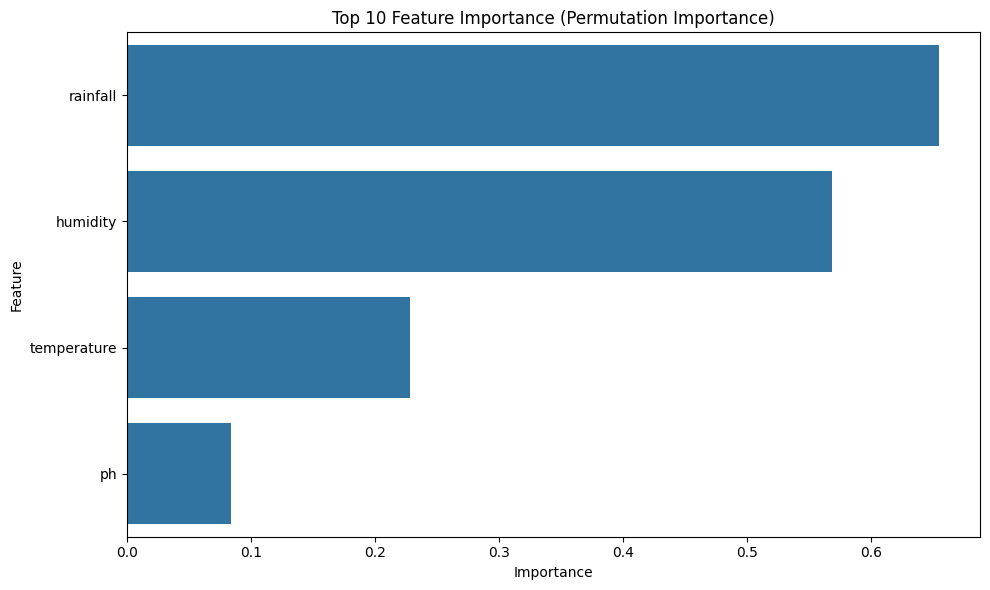

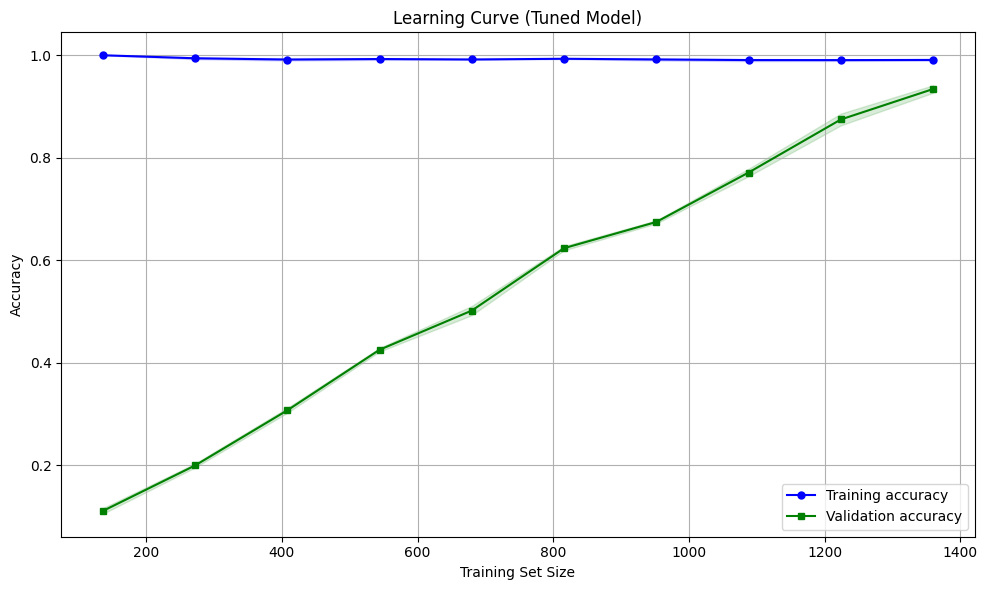

----------------------------------------------------------------------------------------------------


In [145]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create a baseline HistGradientBoostingClassifier with default parameters
base_model = HistGradientBoostingClassifier(random_state=42)
base_model.fit(X_train, y_train)

# Evaluate the baseline model
y_pred_base = base_model.predict(X_test)
y_pred_train = base_model.predict(X_train)
base_accuracy = accuracy_score(y_test, y_pred_base)

print(f"Baseline Model Accuracy Test Set: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Baseline Model Accuracy Train Set: {accuracy_score(y_train, y_pred_train):.4f}")
print('-' *100) 

# Define parameter grid for hyperparameter tuning
from scipy.stats import randint, uniform
param_distributions = {
    'learning_rate': uniform(0.01, 0.3),
    'max_iter': randint(50, 300),
    'max_depth': randint(3, 15),
    'min_samples_leaf': randint(10, 50),
    'max_leaf_nodes': randint(20, 80),
    'l2_regularization': uniform(0, 10),
    'max_bins': randint(100, 255)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Perform hyperparameter tuning
print("Performing hyperparameter tuning. This may take a while...")
print('-' *100)
random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.4f}")
print('-' *100) 

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"Tuned Model Accuracy: {tuned_accuracy:.4f}")
print(f"Improvement over baseline: {(tuned_accuracy - base_accuracy) * 100:.2f}")

# Calculate feature importance using permutation importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42
)

# Sort features by importance
feature_importance = pd.DataFrame({
    'Feature': X.columns, # [f’Feature {i}' for i in range(X.shape[1])],
    'Importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance (Permutation Importance)')
plt.tight_layout()
plt.show()

# Plot learning curves to assess overfitting
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy', n_jobs=-1, random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve (Tuned Model)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = y_pred_base
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = y_pred_tuned
display(grid_model_df.head())

print('-' *100)

## LogisticRegression

Dataset shape: (1700, 4)
Features: 4
Classes: [18 18 18 ...  4  4  4]
Class distribution: [100 100 100  80 100 100  60 100 100 100  86  49 100 100  77  47  74 100
  27 100]
----------------------------------------------------------------------------------------------------
--- Basic Model Performance ---
Accuracy test set: 0.8353
Accuracy train set: 0.8485
----------------------------------------------------------------------------------------------------
--- Basic Model Performance Using Pipeline---
Accuracy test set: 0.8088
Accuracy train set: 0.7971


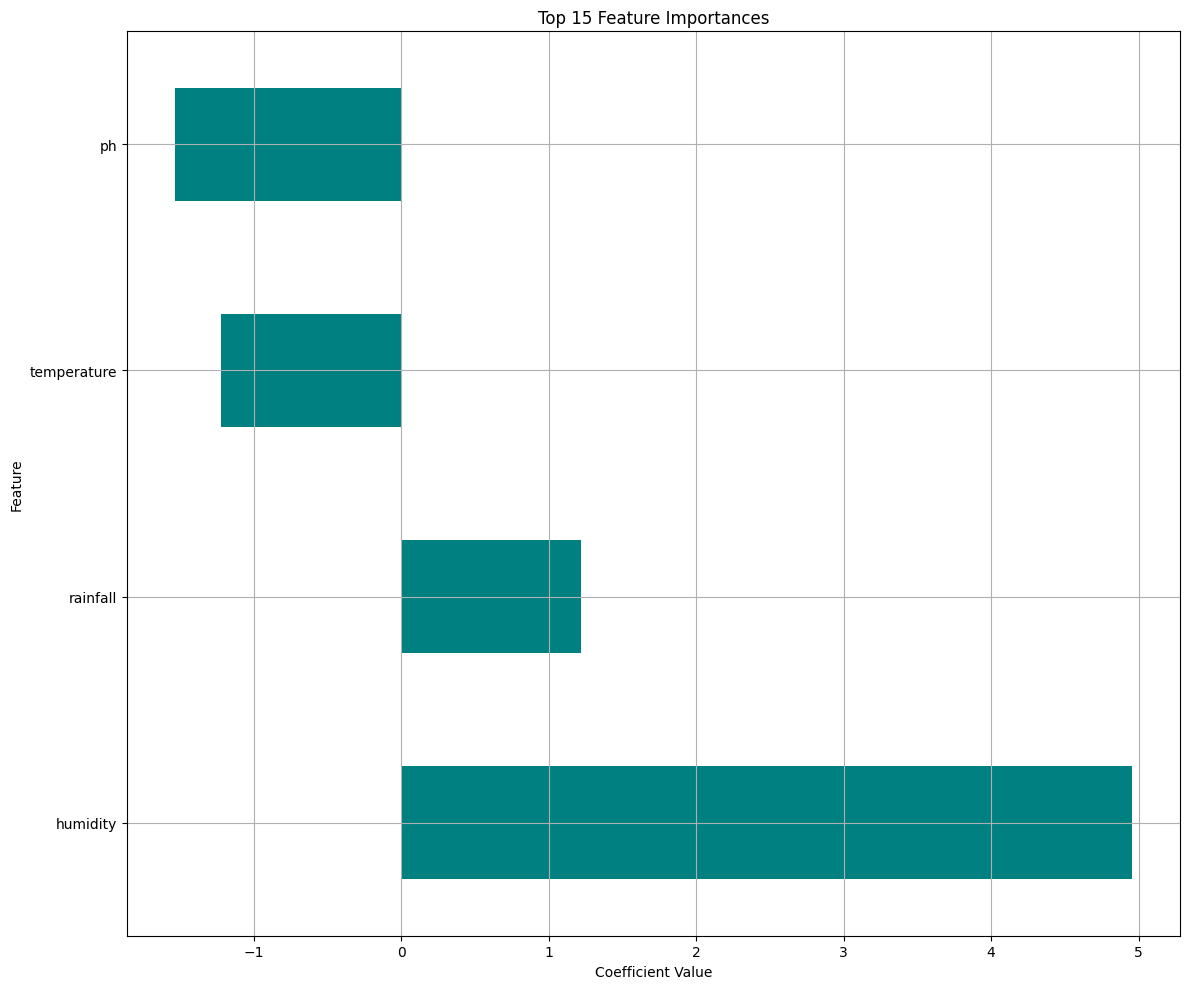

--- Top 10 Most Important Features ---
             Coefficient
humidity        4.956488
rainfall        1.222897
temperature    -1.220153
ph             -1.534960
--- Bottom 10 Least Important Features ---
             Coefficient
humidity        4.956488
rainfall        1.222897
temperature    -1.220153
ph             -1.534960
----------------------------------------------------------------------------------------------------
--- Model With Hyperparameter Tuning ---
Fitting 5 folds for each of 144 candidates, totalling 720 fits

Best Parameters: {'classifier__C': 100, 'classifier__class_weight': None, 'classifier__max_iter': 10000, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}

Best Cross-Validation Score: 0.8581
----------------------------------------------------------------------------------------------------
--- Tuned Model Performance ---
Accuracy Tuned Test: 0.8412
Accuracy Tuned Train: 0.8728
-----------------------------------------------------------------------

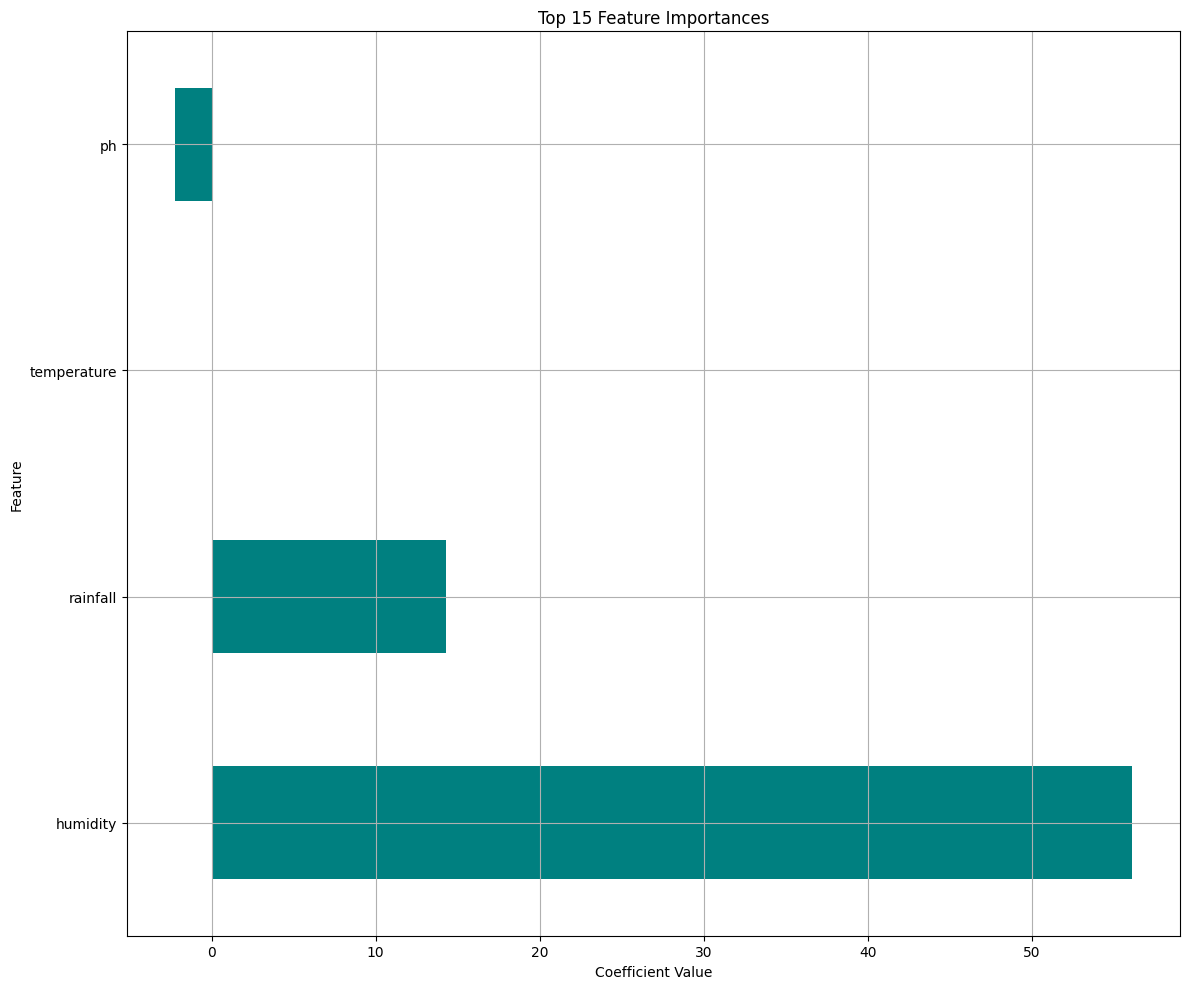

--- Top 10 Most Important Features ---
             Coefficient
humidity       56.134423
rainfall       14.260567
temperature     0.075582
ph             -2.261766
--- Bottom 10 Least Important Features ---
             Coefficient
humidity       56.134423
rainfall       14.260567
temperature     0.075582
ph             -2.261766


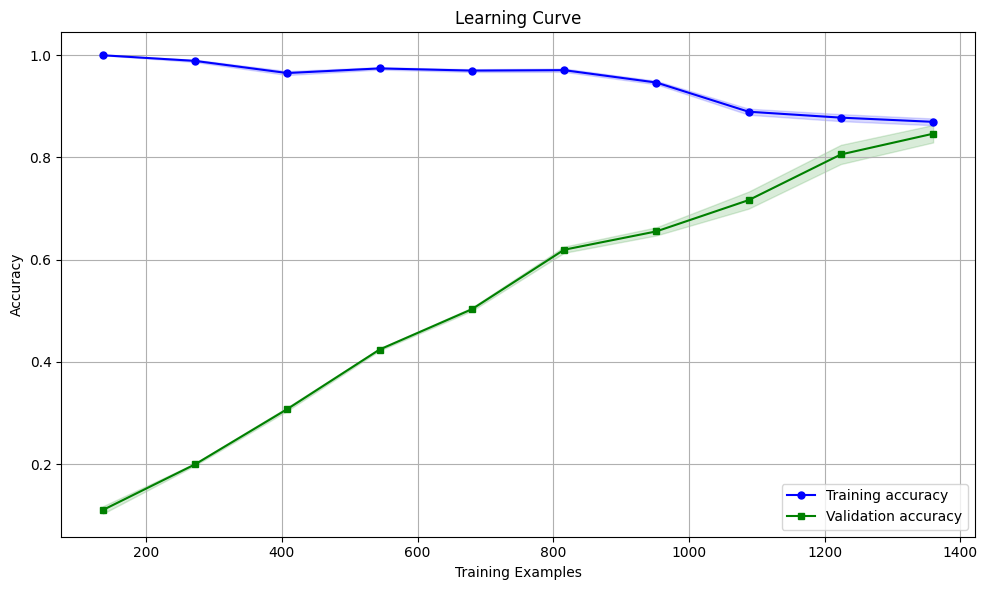

In [150]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df.drop(columns=['label_encoded'], axis=1)
y = df['label_encoded']

# Features and target names
feature_names = X.columns
target_names = y.values

print(f"Dataset shape: {X.shape}")
print(f"Features: {len(feature_names)}")
print(f"Classes: {target_names}")
#print(f"Class distribution: {np.bincount(y)}")
print('-' *100)  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic model with default parameters 
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance ---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print('-' *100)

# Feature importance
basic_model = lr.coef_
if hasattr(basic_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        basic_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances Of Basic Model')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print('-' *100) 
    
# Basic model with default parameters using pipeline
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))  # Logistic regression model
])

pipeline.fit(X_train, y_train)
y_pred_pipe = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance Using Pipeline---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_pipe):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}") 

# Feature importance
pipeline_model = pipeline.named_steps['classifier']
if hasattr(pipeline_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        pipeline_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print('-' *100) 
    
# Hyperparameter tuning with GridSearchCV
print("--- Model With Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear', 'saga'],  # Algorithm to use
    'classifier__max_iter': [10000, 100000, 1000000],  # Max iterations
    'classifier__class_weight': [None, 'balanced']  # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print('-' *100)  

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_train = best_model.predict(X_train)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("--- Tuned Model Performance ---")
print(f"Accuracy Tuned Test: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Accuracy Tuned Train: {accuracy_score(y_train, y_pred_tuned_train):.4f}")
print('-' *100)  

# Compare basic and tuned models
print("--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print('-' *100)  

# Calculate cross-validation scores for both models
cv_scores_basic = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Cross-Validation Scores: {cv_scores_basic}")
print(f"Tuned Model Cross-Validation Scores: {cv_scores_tuned}\n")
print(f"Basic Model Average CV Score: {cv_scores_basic.mean():.4f} ± {cv_scores_basic.std():.4f}")
print(f"Tuned Model Average CV Score: {cv_scores_tuned.mean():.4f} ± {cv_scores_tuned.std():.4f}") 

# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    
# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = y_pred_lr
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = y_pred_tuned
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = y_pred_pipe
display(pipe_model_df.head())  

## RandomForestClassifier

Dataset shape: (1700, 4)
Features: 4
Classes: [18 18 18 ...  4  4  4]
Class distribution: [100 100 100  80 100 100  60 100 100 100  86  49 100 100  77  47  74 100
  27 100]
----------------------------------------------------------------------------------------------------
--- Baseline Random Forest Results ---
Accuracy Test Set: 0.9294
Accuracy Train Set: 1.0000


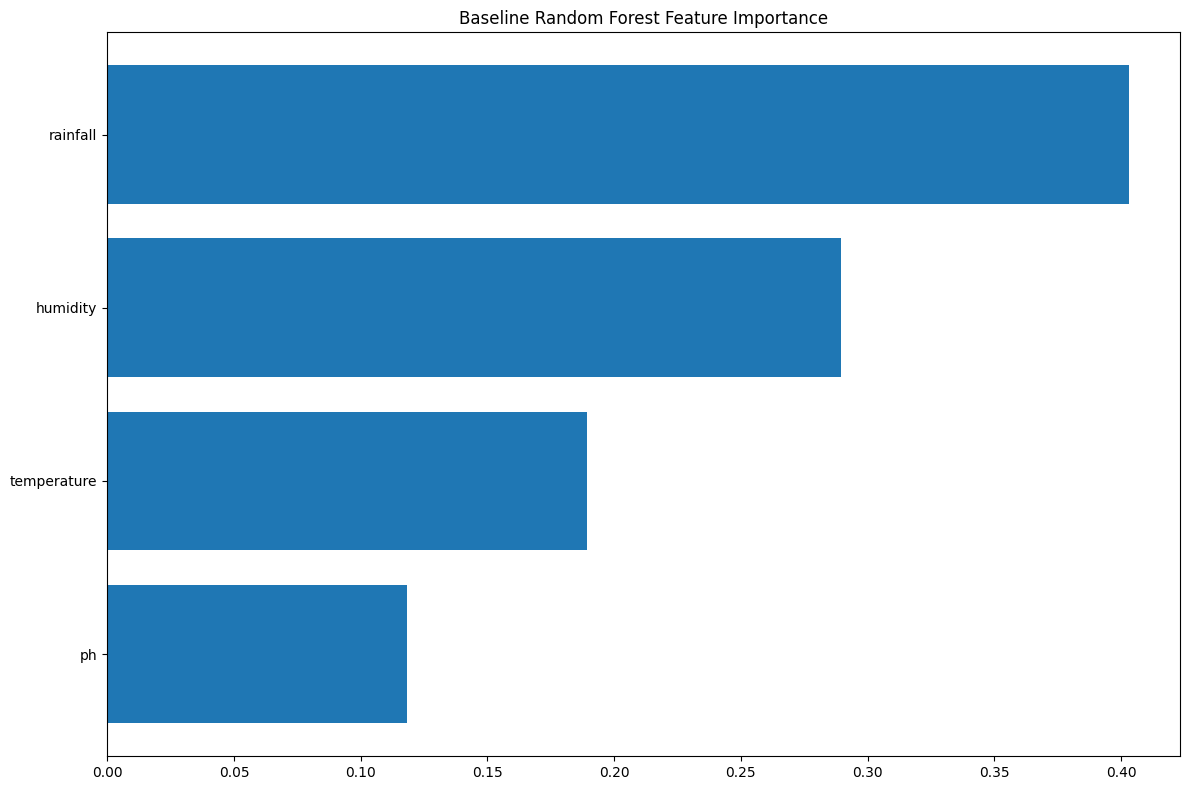

Cross-validation scores: [0.91176471 0.96218487 0.9789916  0.93697479 0.95378151]
Mean CV accuracy: 0.9487
Standard deviation: 0.0229
----------------------------------------------------------------------------------------------------
--- Grid Search Hyperparameter Tuning ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9513


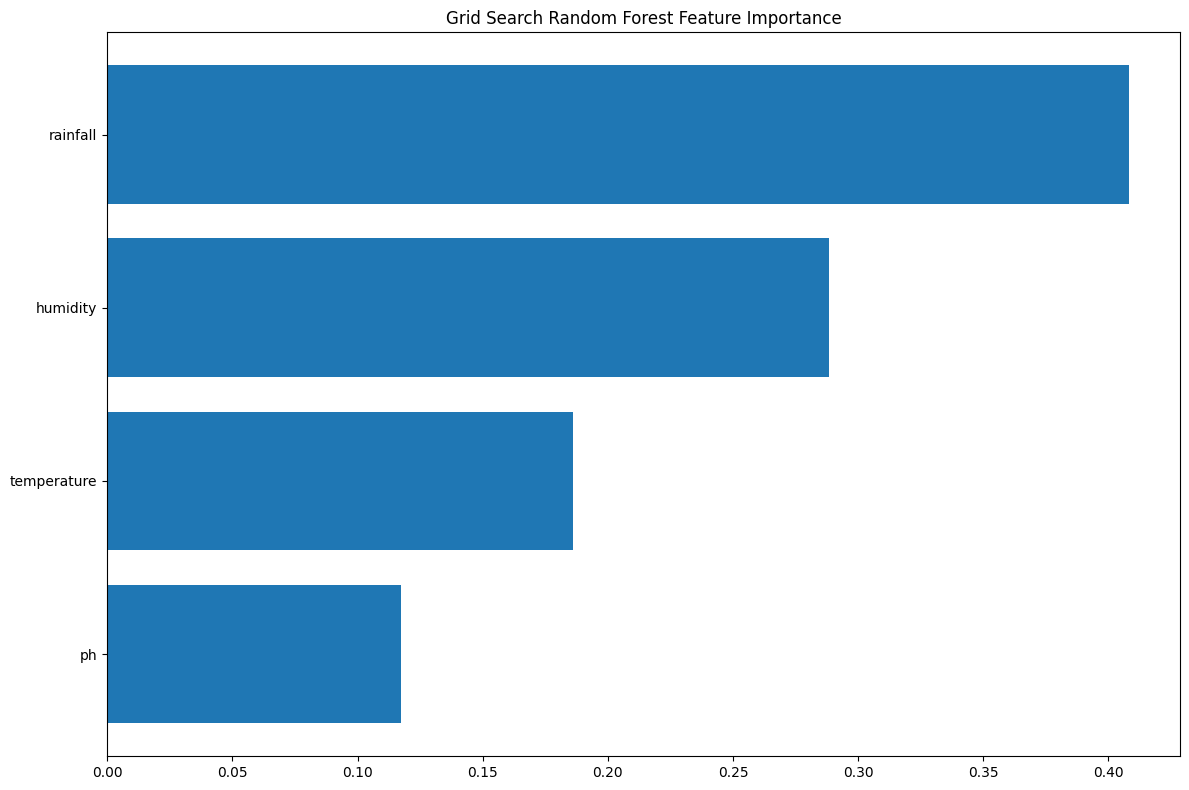

Cross-validation scores: [0.92016807 0.97058824 0.9789916  0.93277311 0.95378151]
Mean CV accuracy: 0.9513
Standard deviation: 0.0222
----------------------------------------------------------------------------------------------------
--- Randomized Search Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Best cross-validation score: 0.9538


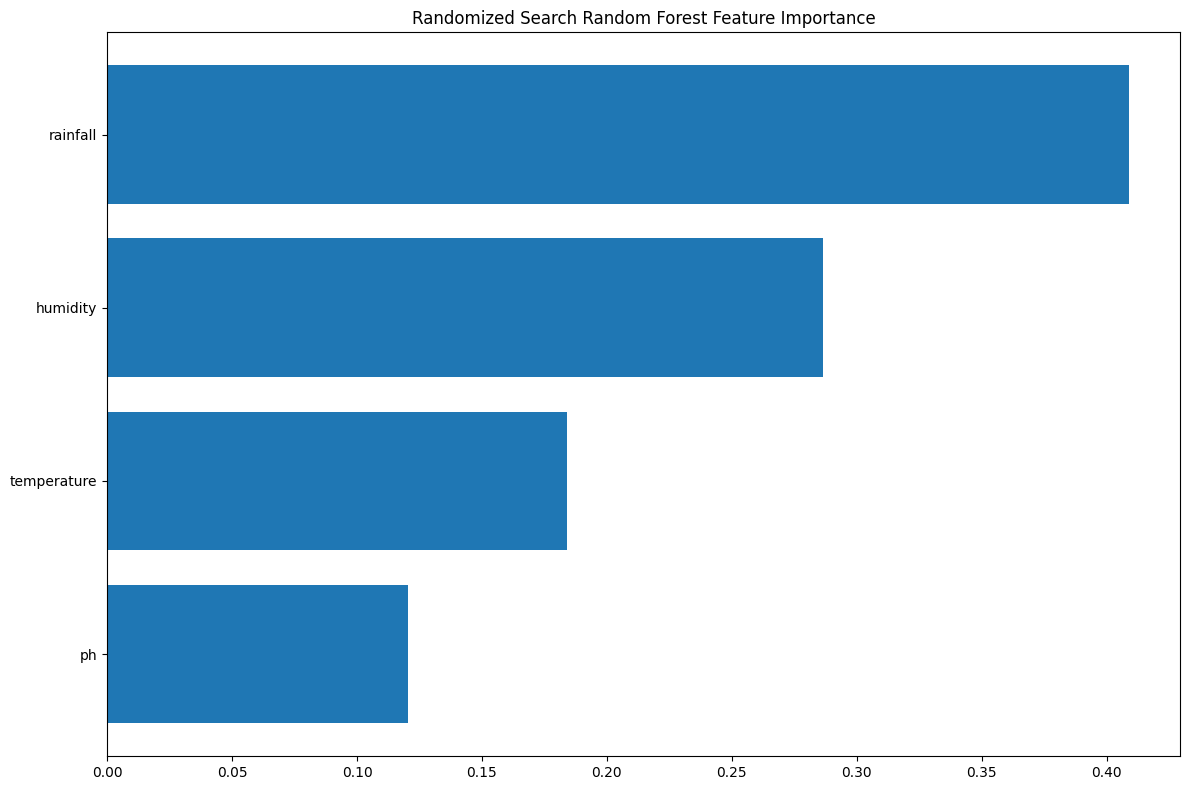

Cross-validation scores: [0.92857143 0.97058824 0.9789916  0.94117647 0.94957983]
Mean CV accuracy: 0.9538
Standard deviation: 0.0186
----------------------------------------------------------------------------------------------------
--- Best Grid Search Model Evaluation ---
Accuracy Test Set: 0.9353
Accuracy Train Set: 0.9916
----------------------------------------------------------------------------------------------------


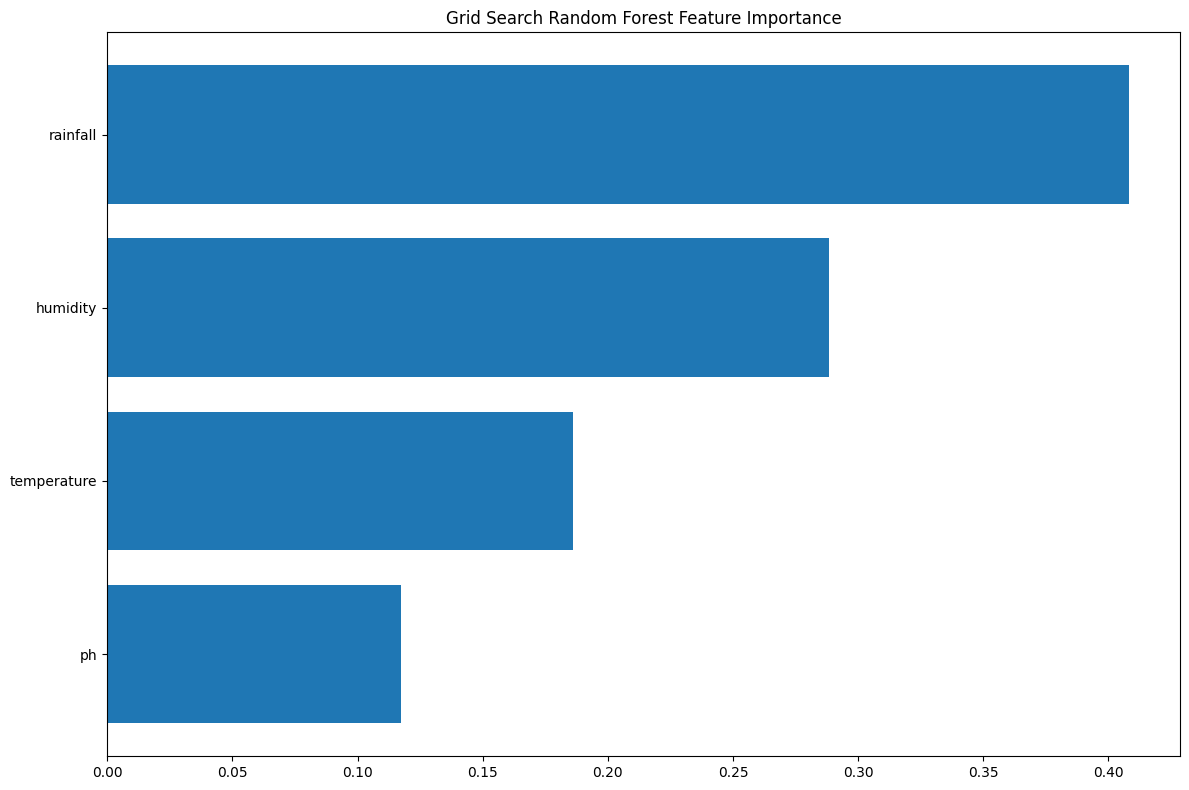

Cross-validation scores: [0.92016807 0.97058824 0.9789916  0.93277311 0.95378151]
Mean CV accuracy: 0.9513
Standard deviation: 0.0222
----------------------------------------------------------------------------------------------------


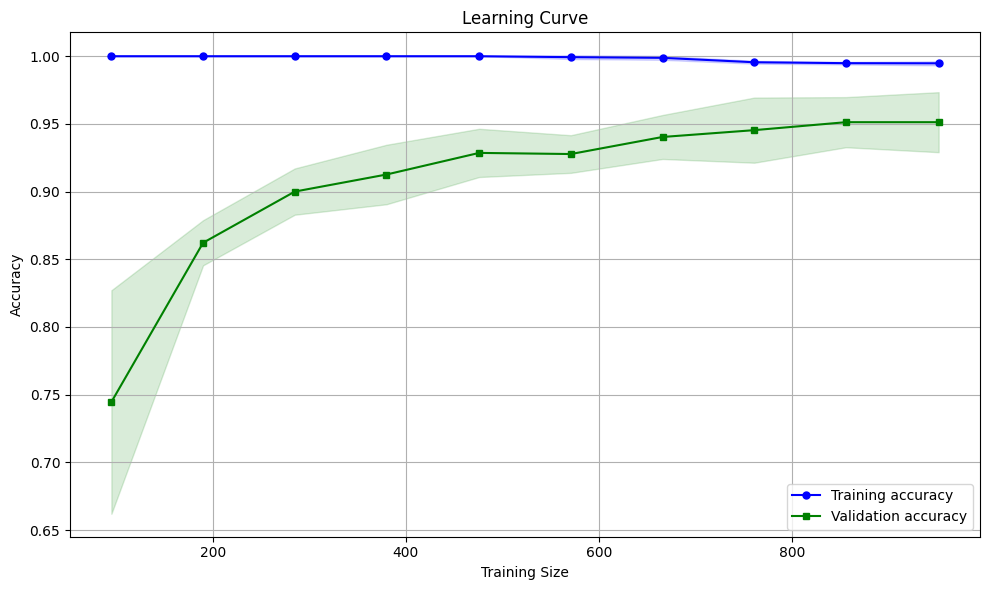

--- Fine-tuning n_estimators ---
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fine-tuned n_estimators: 180
Fine-tuned accuracy: 0.9513
----------------------------------------------------------------------------------------------------
--- Final Optimized Model Results ---
Final parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 180}
Accuracy Test Set: 0.9333
Accuracy Train Set: 0.9924


In [152]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df.drop(columns=['label_encoded'], axis=1)
y = df['label_encoded']

# Features and target names
feature_names = X.columns
target_names = y.values

print(f"Dataset shape: {X.shape}")
print(f"Features: {len(feature_names)}")
print(f"Classes: {target_names}")
print(f"Class distribution: {np.bincount(y)}")
print('-' *100)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional for RandomForest but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Basic Random Forest model (baseline)
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)
y_pred_base = rf_base.predict(X_test_scaled)
y_pred_base_train = rf_base.predict(X_train_scaled)

print("--- Baseline Random Forest Results ---")
print(f"Accuracy Test Set: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Accuracy Train Set: {accuracy_score(y_train, y_pred_base_train):.4f}")

# Feature importance analysis
feature_importances = rf_base.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Baseline Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# Cross-validation of the best model
cv_scores = cross_val_score(rf_base, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *100)  

# 2. GridSearchCV for hyperparameter tuning
print("--- Grid Search Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use smaller param_grid for demonstration purposes (to avoid long execution time)
small_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=small_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Feature importance analysis
feature_importances = grid_search.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Grid Search Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show() 

# Cross-validation of the best model
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *100)  

# 3. RandomizedSearchCV (more efficient for large parameter spaces)
print("--- Randomized Search Hyperparameter Tuning ---")
random_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None] + list(np.arange(10, 50, 10)),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=42
)

randomized_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {randomized_search.best_params_}")
print(f"Best cross-validation score: {randomized_search.best_score_:.4f}")

# Feature importance analysis
feature_importances = randomized_search.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Randomized Search Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show() 

# Cross-validation of the best model
cv_scores = cross_val_score(randomized_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *100) 

# 4. Evaluate the best model from GridSearchCV
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)
y_pred_grid_train = best_grid_model.predict(X_train_scaled)
y_prob_grid = best_grid_model.predict_proba(X_test_scaled)[:, 1]

print("--- Best Grid Search Model Evaluation ---")
print(f"Accuracy Test Set: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Accuracy Train Set: {accuracy_score(y_train, y_pred_grid_train):.4f}")
print('-' *100) 

# 5. Feature importance analysis
feature_importances = best_grid_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
#plt.title('Random Forest Feature Importance')
plt.title('Grid Search Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# 6. Cross-validation of the best model
cv_scores = cross_val_score(best_grid_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *100) 

# 9. Learning curves (optional for deeper analysis)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_grid_model, X_train_scaled, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# 10. Fine-tuning specific parameters (optional based on previous findings)
# For example, fine-tuning n_estimators after discovering optimal ranges
print("--- Fine-tuning n_estimators ---")
estimator_range = np.arange(best_grid_model.n_estimators - 50, best_grid_model.n_estimators + 60, 10)
estimator_range = estimator_range[estimator_range > 0]  # Ensure positive values

param_grid_fine = {
    'n_estimators': estimator_range
}

# Create a new RF with the best parameters from before
rf_fine = RandomForestClassifier(
    random_state=42,
    max_depth=best_grid_model.max_depth,
    min_samples_split=best_grid_model.min_samples_split,
    # Add other parameters from best_grid_model as needed
)

grid_search_fine = GridSearchCV(
    estimator=rf_fine,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search_fine.fit(X_train_scaled, y_train)
print(f"Fine-tuned n_estimators: {grid_search_fine.best_params_['n_estimators']}")
print(f"Fine-tuned accuracy: {grid_search_fine.best_score_:.4f}")
print('-' *100) 

# 11. Final model with all optimized parameters
final_params = grid_search.best_params_.copy()
final_params['n_estimators'] = grid_search_fine.best_params_['n_estimators']

final_model = RandomForestClassifier(random_state=42, **final_params)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)
y_pred_final_train = final_model.predict(X_train_scaled)

print("--- Final Optimized Model Results ---")
print(f"Final parameters: {final_params}")
print(f"Accuracy Test Set: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Accuracy Train Set: {accuracy_score(y_train, y_pred_final_train):.4f}")

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = y_pred_base
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = y_pred_grid
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = y_pred_final
display(pipe_model_df.head()) 

In [ ]:
print(f"The best model for Crop Dataset was Bagging with a Score of {initial_accuracy}")